# Radon API - Basics

 This notebook introduces users to the process of downloading data from the Radon platform using the [REST API](https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon) and performing simple analysis using the Python language with some basic libraries.

The data available through the API service is the same as that available at address [radon/Dane](https://radon.nauka.gov.pl/dane).

This notebook was created for users with basic knowledge of the Python language and with little experience in using API services.

The notebook describes basic queries to the API with various parameters, API responses, and presents simple visualizations on data retrieved from the API.

### Example: Employees 

API documentation for the POL-on Employee service. This API allows the collection of publicly available POL-on data on academic teachers and persons conducting scientific activities. The list includes people with active employment (the date from and date to the terms of employment of the employee are examined - i.e. active terms of employment must exist on a given day). The data are updated once a day (at night). 

https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_employee

In [ ]:
!pip install -r requirements.txt

In [90]:
# Libraries
# Python=3.10.13

import requests
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

The basic action when using an API is to create queries. 

In [91]:
# Basic query for employee service
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'resultNumbers': 1})
response.json()

{'results': [{'professionalTitles': None,
   'lastRefresh': '1693484586782',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': '8374e1ef-a94c-44ab-a435-8f52c983f8c3',
     'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
     'employingInstitutionName': 'Uniwersytet Warszawski'}],
   'personalData': {'firstName': 'Jakub',
    'middleName': 'Mariusz',
    'lastName': 'Turczyn',
    'lastNamePrefix': None},
   'employments': [{'startDate': '2019-10-01',
     'employingInstitutionName': 'Uniwersytet Warszawski',
     'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
     'basicPlaceOfWork': 'Nie dotyczy',
     'declaredDisciplines': {'firstDisciplineName': None,
      'firstDisciplineCode': None,
      'secondDisciplineName': None,
      'secondDisciplineCode': None}}],
   'disciplinaryPenalties': None,
   'penaltyMarker': False,
   'academicTitles': None,
   'managerialFunctions': [],
   'calculatedEduLevel': None,
   'academicDegrees': 

Data is returned in json format that consists of structured key and values pairs and lists. Values are accessed through keys and subscripts, for example to acces personal information about first employee in response you first navigate to 'results' then select first item in a list and then select 'personalData'.

In [92]:
response.json()['results'][0]['personalData']

{'firstName': 'Jakub',
 'middleName': 'Mariusz',
 'lastName': 'Turczyn',
 'lastNamePrefix': None}

In [93]:
response.json()['results'][0]['employments']

[{'startDate': '2019-10-01',
  'employingInstitutionName': 'Uniwersytet Warszawski',
  'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
  'basicPlaceOfWork': 'Nie dotyczy',
  'declaredDisciplines': {'firstDisciplineName': None,
   'firstDisciplineCode': None,
   'secondDisciplineName': None,
   'secondDisciplineCode': None}}]

It is possible to request specific information from an API in a query. The details of the query are determined by used parameters. Possible parameters can be found in the [documentation](https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_employee).

In [94]:
# Employees with name "Jan" and lastname "Kowalski"
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'firstName': 'Jan', 'lastName': 'Kowalski'})
response.json()

{'results': [{'professionalTitles': [{'employeeInInstitutionUuid': 'f0336e0e-aa85-4265-ad70-44d4c1424742',
     'professionalTitleCode': 9,
     'professionalTitleName': 'Magister farmacji',
     'courseName': 'analityka',
     'institutionUuid': None,
     'institutionName': 'Śląska Akademia Medyczna im. L. Waryńskiego w Katowicach; Wydział Farmaceutyczny',
     'foreignInstitutionName': None,
     'graduationYear': '1977',
     'grantingCountry': None}],
   'lastRefresh': '1693486370882',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': 'f0336e0e-aa85-4265-ad70-44d4c1424742',
     'employingInstitutionUuid': 'cd474cbb-d4ba-4475-b0d0-580f5f2e17ef',
     'employingInstitutionName': 'Śląski Uniwersytet Medyczny w Katowicach'}],
   'personalData': {'firstName': 'Jan',
    'middleName': 'Alojzy',
    'lastName': 'Kowalski',
    'lastNamePrefix': None},
   'employments': [{'startDate': '1978-10-01',
     'employingInstitutionName': 'Śląski Uniwersytet Medyczny w Katowicach',

In [95]:
# Employees representing the discipline of astronomy (Polish: astronomia)
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'disciplineName': 'astronomia'})
response.json()

{'results': [{'professionalTitles': None,
   'lastRefresh': '1693484592445',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': '88c298bc-871c-4536-af4b-8f05017967d4',
     'employingInstitutionUuid': '218e39fb-d7f2-405a-a114-dbb87dc59898',
     'employingInstitutionName': 'Centrum Astronomiczne im. Mikołaja Kopernika Polskiej Akademii Nauk'}],
   'personalData': {'firstName': 'Cezary',
    'middleName': None,
    'lastName': 'Gałan',
    'lastNamePrefix': None},
   'employments': [{'startDate': '2020-10-08',
     'employingInstitutionName': 'Centrum Astronomiczne im. Mikołaja Kopernika Polskiej Akademii Nauk',
     'employingInstitutionUuid': '218e39fb-d7f2-405a-a114-dbb87dc59898',
     'basicPlaceOfWork': 'Tak',
     'declaredDisciplines': {'firstDisciplineName': 'astronomia',
      'firstDisciplineCode': 'DS010607N',
      'secondDisciplineName': None,
      'secondDisciplineCode': None}}],
   'disciplinaryPenalties': None,
   'penaltyMarker': False,
   'academicTitles'

In [96]:
# Total number of returned employees
response.json()['pagination']['maxCount']

219

In [97]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'resultNumbers': 1, 'disciplineName': 'nauki biologiczne'})
max_count = response.json()['pagination']['maxCount']
number_of_pages = math.ceil(max_count/100)

f"There\'s {max_count} records and they will be downloaded in {number_of_pages} packages"

"There's 3647 records and they will be downloaded in 37 packages"

In [98]:
employees_list = []
token = None

for _ in tqdm(range(number_of_pages)):
    response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", 
                            params={'disciplineName': 'nauki biologiczne',
                                    'resultNumbers': 100, 
                                    'token': token}
                           )
    token = response.json()['pagination']['token']
    employees_list.extend(response.json()['results'])

100%|██████████| 37/37 [00:31<00:00,  1.16it/s]


In [99]:
employees_list[0]

{'professionalTitles': [{'employeeInInstitutionUuid': 'd0a3a057-8d24-4af3-99d6-954ca1ce513e',
   'professionalTitleCode': 4,
   'professionalTitleName': 'Magister inżynier',
   'courseName': 'ogrodnictwo',
   'institutionUuid': None,
   'institutionName': 'Akademia Rolnicza w Szczecinie',
   'foreignInstitutionName': None,
   'graduationYear': '1996',
   'grantingCountry': None}],
 'lastRefresh': '1693484586907',
 'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': 'd0a3a057-8d24-4af3-99d6-954ca1ce513e',
   'employingInstitutionUuid': 'e089e89f-100d-4446-96ca-e31f5d670002',
   'employingInstitutionName': 'Zachodniopomorski Uniwersytet Technologiczny w Szczecinie'}],
 'personalData': {'firstName': 'Marcin',
  'middleName': 'Piotr',
  'lastName': 'Kubus',
  'lastNamePrefix': None},
 'employments': [{'startDate': '2016-11-02',
   'employingInstitutionName': 'Zachodniopomorski Uniwersytet Technologiczny w Szczecinie',
   'employingInstitutionUuid': 'e089e89f-100d-4446-96ca-e31f5d6

In [100]:
employees_list[0]['personalData']

{'firstName': 'Marcin',
 'middleName': 'Piotr',
 'lastName': 'Kubus',
 'lastNamePrefix': None}

In [101]:
employees_list[0]['calculatedEduLevel']

'dr hab.'

In [102]:
# Some fields are nested. It may be necessary to normalize/flatten them depending on the problem. For example "personalData" in employees is one of such fields.
df_employees = pd.json_normalize(employees_list)
df_employees = df_employees.sort_values(by=['personalData.lastName'])
df_employees[['personalData.firstName', 'personalData.middleName', 'personalData.lastName', 'calculatedEduLevel']].head(5)

,personalData.firstName,personalData.middleName,personalData.lastName,calculatedEduLevel
1955,KARIM,None,ABU NAHIA,mgr
3325,MAGDALENA,ŁUCJA,ACHREM,dr hab.
2157,KINGA,None,ADAMCZYK-WĘGLARZY,mgr
1756,MAŁGORZATA,None,ADAMSKA,dr hab.
3137,KAMILA,None,AFFEK,mgr


In [103]:
# Sometimes json_normalize od from_records methods are not enought to correctly extract information from json. In such case simplest solution is to iterate over rows and process json yourself.
# It is more efficent to collect information about employment for all individuals and then to update the whole DataFrame than to update it on each iteration.
employments = []

for _, row in df_employees.iterrows():
    # List of employing institutions for one person
    employment_list = []
    for employtment in row['employments']:
        employment_list.append(employtment['employingInstitutionName'])
    
    employments.append(employment_list)
    
df_employees['employingInstitutionName'] = employments

View of employees table on [Radon](https://radon.nauka.gov.pl/dane/nauczyciele-akademiccy-badacze-i-osoby-zaangazowane-w-dzialalnosc-naukowa?disciplineCode=DS010603N&pageNumber=1) for biological sciences (Polish: nauki biologiczne)

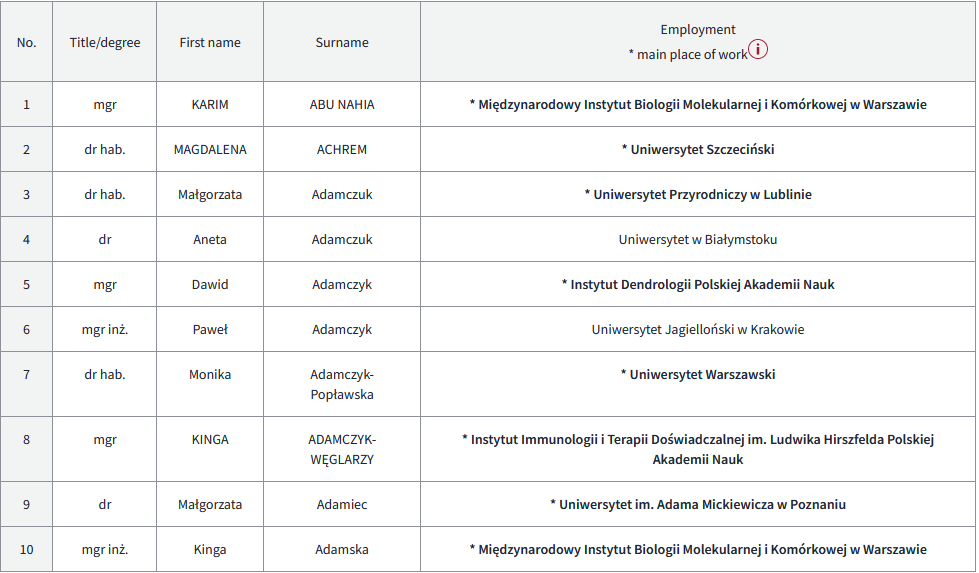

In [104]:
# Recreated table using data from the API
df_employees[['personalData.firstName', 'personalData.lastName', 'calculatedEduLevel', 'employingInstitutionName']]

,personalData.firstName,personalData.lastName,calculatedEduLevel,employingInstitutionName
1955,KARIM,ABU NAHIA,mgr,[Międzynarodowy Instytut Biologii Molekularnej...
3325,MAGDALENA,ACHREM,dr hab.,[Uniwersytet Szczeciński]
2157,KINGA,ADAMCZYK-WĘGLARZY,mgr,[Instytut Immunologii i Terapii Doświadczalnej...
1756,MAŁGORZATA,ADAMSKA,dr hab.,[Uniwersytet Szczeciński]
3137,KAMILA,AFFEK,mgr,[Międzynarodowy Instytut Biologii Molekularnej...
...,...,...,...,...
2996,Marek,Żywicki,dr hab.,[Uniwersytet im. Adama Mickiewicza w Poznaniu]
3286,Magdalena,Żywiec,dr hab.,[Instytut Botaniki im. Władysława Szafera Pols...
2570,Waldemar,Żyła,dr,[Muzeum Górnośląskie w Bytomiu]
2090,Dagmara,Żyła,dr,[Muzeum Górnośląskie w Bytomiu]


In [105]:
df_employees.sort_values(by=['personalData.lastName']).head(1)['employments'].values[0]

[{'startDate': '2023-02-01',
  'employingInstitutionName': 'Międzynarodowy Instytut Biologii Molekularnej i Komórkowej w Warszawie',
  'employingInstitutionUuid': 'e16daa5b-e06b-4c65-8f73-a281aafeddfd',
  'basicPlaceOfWork': 'Tak',
  'declaredDisciplines': {'firstDisciplineName': 'nauki biologiczne',
   'firstDisciplineCode': 'DS010603N',
   'secondDisciplineName': None,
   'secondDisciplineCode': None}}]

In [106]:
df_employees['calculatedEduLevel'].unique()

array(['mgr', 'dr hab.', None, 'dr', 'mgr inż.', 'prof. dr hab.', 'lic.',
       'inż.', 'lek. wet.', 'mgr, inż.', 'lek.', 'prof. dr'], dtype=object)

In [107]:
# Map polish degrees names to english
degrees_polish2english = {
    'mgr': 'MSc/Ma', 
    'dr hab.': 'PhD, DSc', 
    'dr': 'PhD', 
    'mgr inż.': 'BEng, MSc', 
    'prof. dr hab.': 'ProfTit, PhD, DSc', 
    'lic.': 'BSc/BA', 
    'inż.': 'BEng', 
    'lek. wet.': 'VetMD', 
    'mgr, inż.': 'BEng, MSc', 
    'lek.': 'MD', 
    'prof. dr': 'ProfTit', 
}

df_employees['calculatedEduLevel'] = df_employees['calculatedEduLevel'].map(degrees_polish2english)

In [108]:
aggregated_edu_levels = df_employees['calculatedEduLevel'].value_counts()
aggregated_edu_levels

calculatedEduLevel
PhD                  1647
PhD, DSc              887
MSc/Ma                414
ProfTit, PhD, DSc     341
BEng, MSc             119
BSc/BA                 20
BEng                   17
VetMD                  11
MD                      5
ProfTit                 2
Name: count, dtype: int64

In [109]:
aggregated_edu_levels = aggregated_edu_levels[aggregated_edu_levels > 10]
aggregated_edu_levels

calculatedEduLevel
PhD                  1647
PhD, DSc              887
MSc/Ma                414
ProfTit, PhD, DSc     341
BEng, MSc             119
BSc/BA                 20
BEng                   17
VetMD                  11
Name: count, dtype: int64

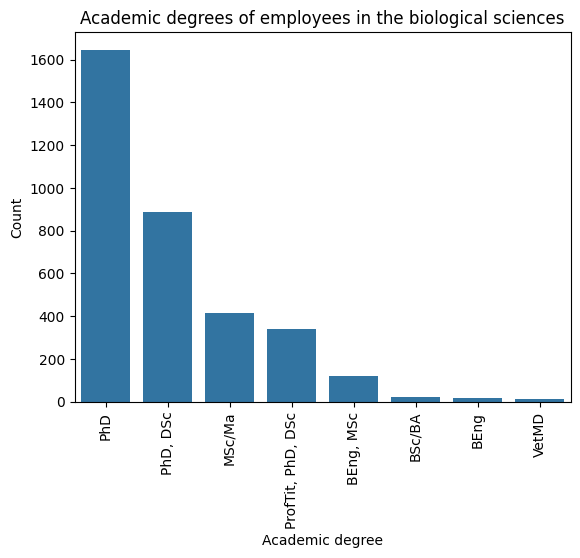

In [110]:
sns.barplot(aggregated_edu_levels)
plt.xticks(rotation=90)
plt.xlabel("Academic degree")
plt.ylabel("Count")
plt.title("Academic degrees of employees in the biological sciences")
plt.show()

### Projects Example

API documentation for the POL-on Projects service. This API allows the collection of publicly available POL-on data on scientific projects. The data come from the POL-on integrated system of information on science and higher education and are updated once a day (at night) - the list reflects the state of the POL-on data from the previous day. Legal basis: Act of 20 July 2018 on Higher Education and Science.

https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_project

In [111]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", params={'resultNumbers': 2})

response.json()

{'results': [{'projectAbstractEn': 'Neurological disorders (NDs) account for a large and increasing health burden worldwide (the third most common cause of disability and premature death), (Deuschl et al, 2020). The most common neurodegenerative disorders are Alzheimer disease (AD), Parkinson disease (PD) and frontotemporal dementia (FTD). There are some diagnostic methods, e.g. analysis of cerebrospinal fluid (CSF) and molecular imaging of the brain, enabling the stratification of patients, but they are limited as tools for population screening. Amyloid beta (Aβ) and tau protein are invariant determinants of Alzheimer disease (AD). The amyloid-β(42) is considered as AD biomarker that distinguish between AD and frontotemporal dementia (FTD) patients (Jeromin et al, 2019). The α-synuclein (α-Syn), best known for its role in Parkinson’s disease (PD), has been suggested to be involved in cognition and pathogenesis of AD (Korff et al, 2013; Ashton et al, 2020). The selected biomarkers Aβ(4

In [112]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", params={'resultNumbers': 1})
max_count = response.json()['pagination']['maxCount']
number_of_pages = math.ceil(max_count/100)

f"There\'s {max_count} records and they will be downloaded in {number_of_pages} packages"

"There's 32898 records and they will be downloaded in 329 packages"

In [113]:
projects_list = []
token = None

for p in tqdm(range(number_of_pages)):
    response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", 
                            params={'resultNumbers': 100, 
                                    'token': token}
                           )
    token = response.json()['pagination']['token']
    projects_list.extend(response.json()['results'])

100%|██████████| 329/329 [06:37<00:00,  1.21s/it]


In [114]:
df_projects = pd.DataFrame.from_records(projects_list)
df_projects_length = df_projects[['projectTitlePl', 'projectTitleEn', 'projectStartDate', 'projectEndDate']]
df_projects_length.head(5)

,projectTitlePl,projectTitleEn,projectStartDate,projectEndDate
0,Multimodalne elektrochemiczno-optyczne układy ...,Photoenhanced multimodal electrochemical-optic...,2022-05-11,2025-05-10
1,Nauka polska w epoce nowożytnej. Idee i ludzie...,None,2022-10-01,2023-05-31
2,Badania kondensatorów elektrochemicznych o wys...,None,2019-04-01,2019-09-30
3,„Zaawansowane i innowacyjne metody edukacji i ...,Building European Nuclear Competence through c...,2022-06-01,2026-05-31
4,Ochrona krajobrazu w ocenach oddziaływania na ...,None,2018-01-01,2018-12-31


In [115]:
df_projects_length['projectStartDate'] = pd.to_datetime(df_projects_length['projectStartDate'])
df_projects_length['projectEndDate'] = pd.to_datetime(df_projects_length['projectEndDate'])

df_projects_length['projectLengthDays'] = df_projects_length['projectEndDate'] - df_projects_length['projectStartDate']
df_projects_length['projectLengthDays'] = df_projects_length['projectLengthDays'].dt.days

C:\Users\micha\AppData\Local\Temp\ipykernel_7124\3812858152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_projects_length['projectStartDate'] = pd.to_datetime(df_projects_length['projectStartDate'])
C:\Users\micha\AppData\Local\Temp\ipykernel_7124\3812858152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_projects_length['projectEndDate'] = pd.to_datetime(df_projects_length['projectEndDate'])
C:\Users\micha\AppData\Local\Temp\ipykernel_7124\3812858152.py:4: SettingWithCopyWarning: 
A value i

In [116]:
df_projects_length[['projectTitlePl', 'projectTitleEn', 'projectStartDate', 'projectEndDate', 'projectLengthDays']].head(5)

,projectTitlePl,projectTitleEn,projectStartDate,projectEndDate,projectLengthDays
0,Multimodalne elektrochemiczno-optyczne układy ...,Photoenhanced multimodal electrochemical-optic...,2022-05-11,2025-05-10,1095
1,Nauka polska w epoce nowożytnej. Idee i ludzie...,None,2022-10-01,2023-05-31,242
2,Badania kondensatorów elektrochemicznych o wys...,None,2019-04-01,2019-09-30,182
3,„Zaawansowane i innowacyjne metody edukacji i ...,Building European Nuclear Competence through c...,2022-06-01,2026-05-31,1460
4,Ochrona krajobrazu w ocenach oddziaływania na ...,None,2018-01-01,2018-12-31,364


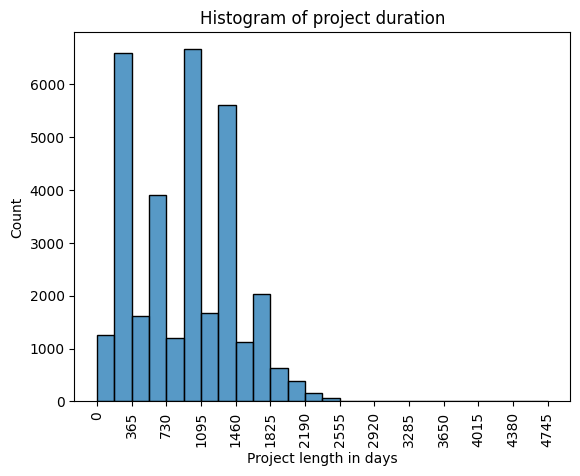

In [118]:
graph = sns.histplot(data=df_projects_length, x='projectLengthDays', binwidth=365/2)

plt.xlabel("Project length in days")
plt.ylabel("Count")
plt.title("Histogram of project duration") 

plt.xticks(range(0, 365*14, 365), rotation='vertical')

plt.show()